# Discussion- EDA 

In [1]:
% matplotlib inline

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm


sns.set(style="whitegrid")

In [3]:
data = pd.read_csv( "data.csv", header=0)

The.csv file is loaded into data variable. LEt's look at the characteristics of the data for ensuring that it has been loaded properly.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


There are 4600 records (or observations) and no missing values. There are 5 object variables and rest 13 are numerical variables. To get the feel of the data let's look at the first few rows.

In [5]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


The date variable needs formatting and the street and zip coulumns needs extra care in including in the analysis.

Let's look at our target variable Price.

**Price**

Price denotes the price of the house. This is determined/ influenced by various factors given in this dataset.

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
data["price"].describe()

count       4600.00
mean      551962.99
std       563834.70
min            0.00
25%       322875.00
50%       460943.46
75%       654962.50
max     26590000.00
Name: price, dtype: float64

One striking thing to notice is minumum price being 0.00 which is not possible it is either some typo or data entry mistake. The mean price of the houses is $551,962k and the maximim price is $26,590,000. The maximum value does look like an outlier. 50% of the houses sold for less than \\$460,943 which shows that the mean is very skewed.

To see further into the 0.00 priced house let's do the value counts for price.

In [8]:
data.price.value_counts()

0.00          49
300000.00     42
400000.00     31
450000.00     29
600000.00     29
440000.00     29
350000.00     28
435000.00     27
250000.00     27
550000.00     27
415000.00     27
475000.00     26
530000.00     26
525000.00     26
330000.00     25
500000.00     24
425000.00     24
385000.00     23
235000.00     23
345000.00     23
320000.00     22
280000.00     22
375000.00     22
325000.00     22
405000.00     22
560000.00     21
410000.00     21
650000.00     21
535000.00     20
285000.00     20
              ..
372000.00      1
261350.00      1
322000.00      1
500324.00      1
326100.00      1
1222500.00     1
607000.00      1
167500.00      1
224500.00      1
635700.00      1
367000.00      1
1255000.00     1
545500.00      1
305495.00      1
108333.33      1
553650.00      1
258125.00      1
280927.00      1
465250.00      1
518500.00      1
857000.00      1
415500.00      1
458400.00      1
280950.00      1
342400.00      1
586500.00      1
693000.00      1
226500.00     

There are 49 houses whose price values are 0. This is some serious data entry problem in our data .Let's replace the zeros with the mean prices for performing further analysis of this dataset.

In [9]:
data['price'] = data['price'].replace(0.00, np.nan)

In [10]:
data['price'].fillna(data['price'].mean(), inplace=True)


In [11]:
data['price'].describe()

count       4600.00
mean      557905.90
std       560917.63
min         7800.00
25%       328158.93
50%       468750.00
75%       654962.50
max     26590000.00
Name: price, dtype: float64

The minimum price is now $7800 and the mean and standard deviation are $557,905 and $560,917. Let's plot thos data now. The distribution of price looks skewed. 

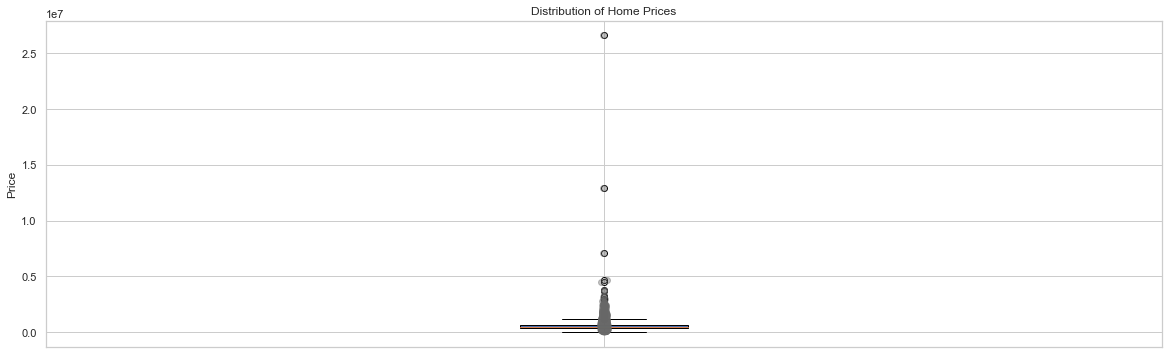

In [12]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(data[ "price"], labels=[''], showfliers=True, patch_artist=True, zorder=1)
axes.set_title("Distribution of Home Prices")
axes.set_ylabel("Price")
x = np.random.normal(1, 0.001, size=len(data["price"]))
axes.plot(x, data["price"], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

It is very difficult to get a clear picture of this box plot because of the distribution of price being very skewed as mentioned earlier. Let's take log transformation of price to see if it does any better. 

In [13]:
data["log_price"] = data[ "price"].apply(lambda x: np.log10(x))

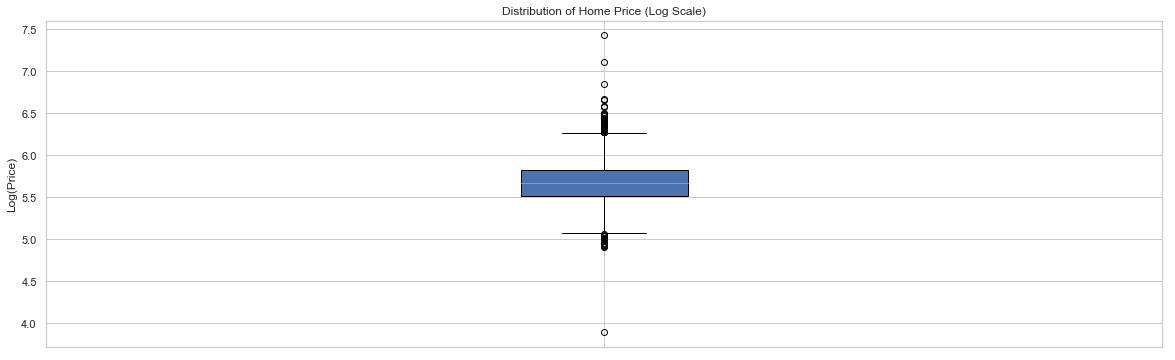

In [14]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(data[ "log_price"], labels=[""], \
                     showfliers=True, patch_artist=True, zorder=1)
axes.set_title("Distribution of Home Price (Log Scale)")
axes.set_ylabel("Log(Price)")

plt.show()
plt.close()

There appears to be little variability on the higher range but the dataset is not big enough to conclude anything solid at this point. This can be better viewed as a histogram.

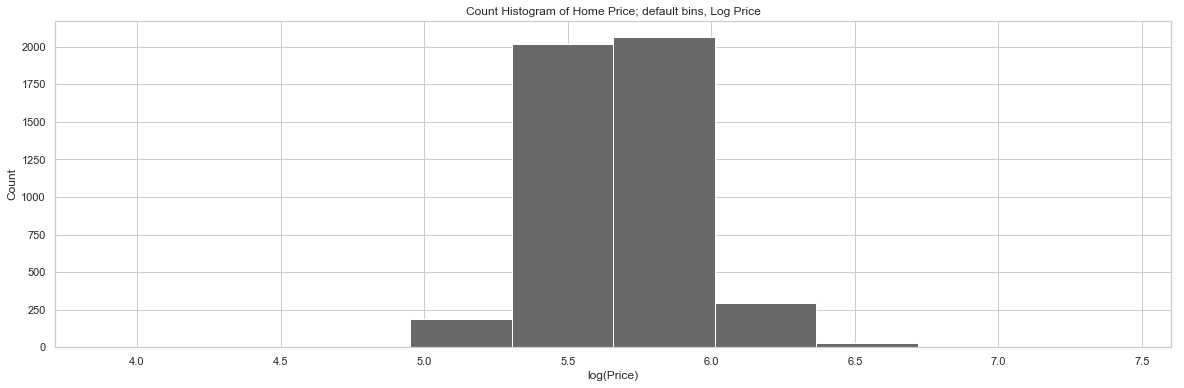

In [15]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(data[ "log_price"], color="DimGray")
axes.set_xlabel( "log(Price)")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Home Price; default bins, Log Price")

plt.show()
plt.close()

As expected there is a very little variability on the higher range of prices. The prices are mostly on the same range for this dataset. 

**Sqft_lot**

The size of the lot is the total square feet of the property.

In [16]:
data["sqft_lot"].describe()

count      4600.00
mean      14852.52
std       35884.44
min         638.00
25%        5000.75
50%        7683.00
75%       11001.25
max     1074218.00
Name: sqft_lot, dtype: float64

The smallest lot is 638 square feet. The largest lot is 1,074,218 square feet. We can perform a log transformation on sqft_lot to scale these values.

In [17]:
data["log_sqft_lot"] = data[ "sqft_lot"].apply(lambda x: np.log10(x))

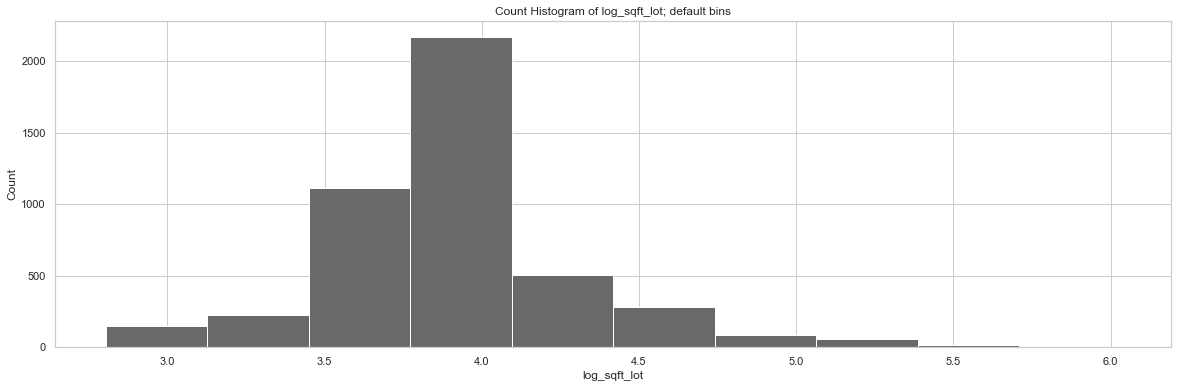

In [18]:
feature = "log_sqft_lot"

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(data[feature], color="DimGray")
axes.set_xlabel("log_sqft_lot")
axes.set_ylabel("Count")
axes.set_title("Count Histogram of " + feature + "; default bins")

plt.show()
plt.close()

The distribution is fairly normal with apparent skewness.  

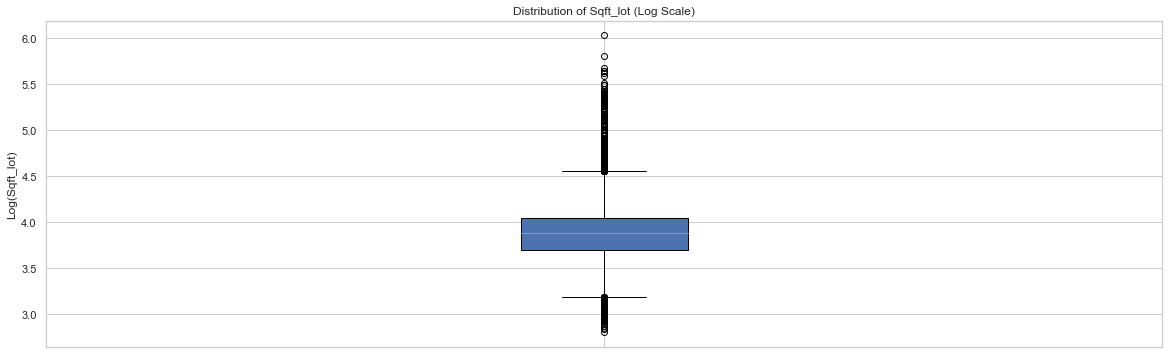

In [19]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(data[ "log_sqft_lot"], labels=[""], \
                     showfliers=True, patch_artist=True, zorder=1)
axes.set_title("Distribution of Sqft_lot (Log Scale)")
axes.set_ylabel("Log(Sqft_lot)")

plt.show()
plt.close()

There appears to be a large variability on the higher range of the sqft_lot which is common as most of the houses will be of average lot size with few houses being very big. 

**Sqft_above**

Sqft_above is the living space above the basement. For analysis the variable, sqft_basement has to be considered along with this as these two variable together contribute to the sqft_living. 

In [20]:
data["sqft_above"].describe()

count   4600.00
mean    1827.27
std      862.17
min      370.00
25%     1190.00
50%     1590.00
75%     2300.00
max     9410.00
Name: sqft_above, dtype: float64

The minimum sqft_above is 370 sq.ft and the maximum value is 9410 sq.ft where 50% of the houses in our dataset has sqft_above below 1590 sq.ft.Let's take the log transformation of this variable as well as per the values shown above the data is not distributed normally. 

In [21]:
data["log_sqft_above"] = data[ "sqft_above"].apply(lambda x: np.log10(x))

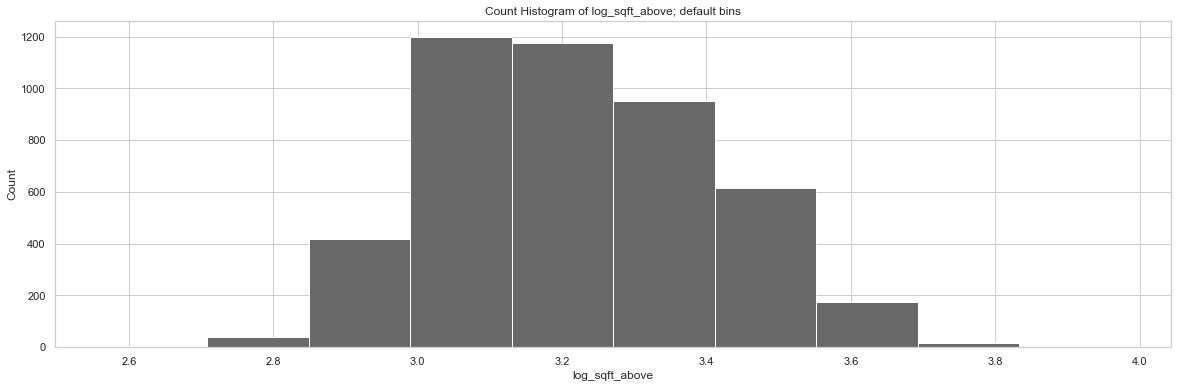

In [22]:
feature = "log_sqft_above"

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(data[feature], color="DimGray")
axes.set_xlabel(feature)
axes.set_ylabel("Count")
axes.set_title("Count Histogram of " + feature + "; default bins")

plt.show()
plt.close()

There is still some skewness attached to the data which in my opinon might be due to the bias in the data set.. 

**Condition**

Condition might refer to the condition (new,old etc) of the house. This is a categorical variable; Let's look at the describe function to see the categories and its corresponding values.

In [23]:
data["condition"].value_counts().sort_index()

1       6
2      32
3    2875
4    1252
5     435
Name: condition, dtype: int64

There are 5 possible values where 3 and 4 have more number of houses in our dataset.Given the price range I am guessing higher the condition better is the condition of the house. I am still now clear about the definition hoping to get some clues from pairwise EDA.

In [24]:
def bar_charts(data, feature):
    counts = data[feature].value_counts().sort_index()
    proportions = data[feature].value_counts(normalize=True).sort_index()
    x = range( len( counts))
    width = 1/1.5

    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)
    axes.set_xlabel(feature)
    axes.bar(x, proportions, width, color="dimgray", align="center")
    axes.set_xticks(x)
    axes.set_xticklabels(proportions.axes[0])
    axes.set_title( "Relative Frequency of " + feature)
    axes.set_ylabel( "Percent")
    axes.xaxis.grid(False)

    plt.show()
    plt.close()

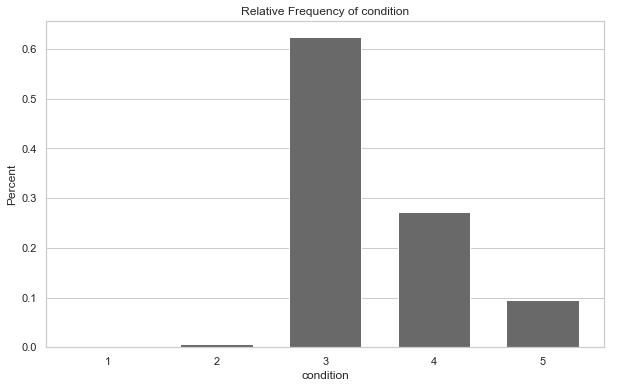

In [25]:
bar_charts(data, "condition")

It can be clearly seen that there are more number of houses with conditions 3 and 5 which shows clear bias of this dataset.

**View**

View again is context specific. Generally houses with better views will be more expensive. 

In [26]:
data["view"].value_counts().sort_index()

0    4140
1      69
2     205
3     116
4      70
Name: view, dtype: int64

There are again 5 categories and there are 4140 houses with views numbered 0 followed by views numbered '1'. Again not clear/sure what does the number signify. But there is some clear bias in the dataset.

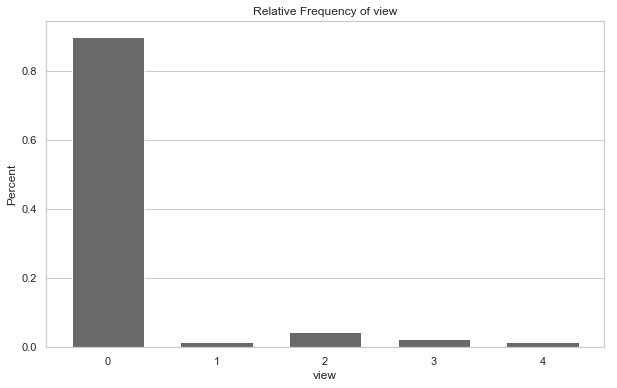

In [27]:
bar_charts(data, "view")

The bias is clearly evident in above bar chart.
Now that we have seen each individual variable let's see the relationship between our target variable 'price' with other 4 variables.

**Pairwise EDA**

In [28]:
#Functions from previous labs

def correlation(data, x, y):
    print("Correlation coefficients:")
    print( "r   =", stats.pearsonr(data[x], data[y])[0])
    print( "rho =", stats.spearmanr(data[x], data[y])[0])
    
def describe_by_category(data, numeric, categorical):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    print(grouped_y)

    
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):

    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs( 0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="DimGray", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")

    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOWESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)

    plt.show()
    plt.close()
    


**Sqft lot vs Price**

Not sure of the lot size having any impact over the price of the house lets find pearson andd spearman correlations of price and sqft_lot.

In [29]:
correlation(data, "sqft_lot", "price")

Correlation coefficients:
r   = 0.051186408955826046
rho = 0.08635607150943876


As expected there isn't any correlation between these two variables. But on the other hand sqft_living might have positive correlation with the price. Let's also see if the transformed sqft_lot does any better.

In [30]:
correlation(data, "log_sqft_lot", "log_price")

Correlation coefficients:
r   = 0.12681736304946484
rho = 0.08635607150943876


The log transformed sqft_lot also doesn't show any correlation with price variable.

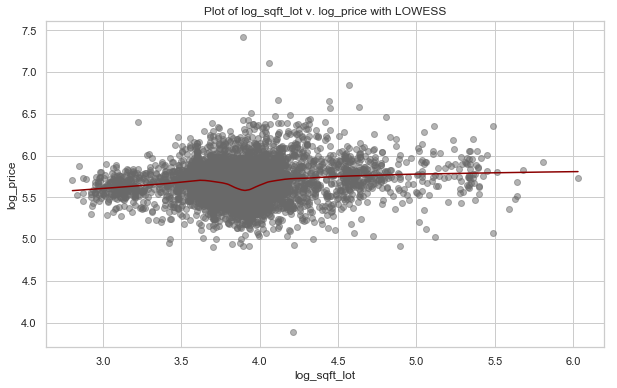

In [31]:
lowess_scatter(data, "log_sqft_lot", "log_price")

The line is very nearly horizontal which is what  we saw in the $r$ statistic table.

** Sqft_above vs Price **

The sqft_above will have some influence on the price but not as much as sqft_living. Let's see if our assumptions are right. Lets see both untransformed and lof transformed sqft_above.

In [32]:
correlation(data, "sqft_above", "price")

Correlation coefficients:
r   = 0.3752390608821424
rho = 0.5510460059914154


In [33]:
correlation(data, "log_sqft_above", "price")

Correlation coefficients:
r   = 0.34128506849745316
rho = 0.5510460059914154


As expected there is some degree of correlation between the variables but the pearson cofficient is not strong enough but spearman coefficient point to slight monotonic relationship. This can be better visualized in scatter plot.

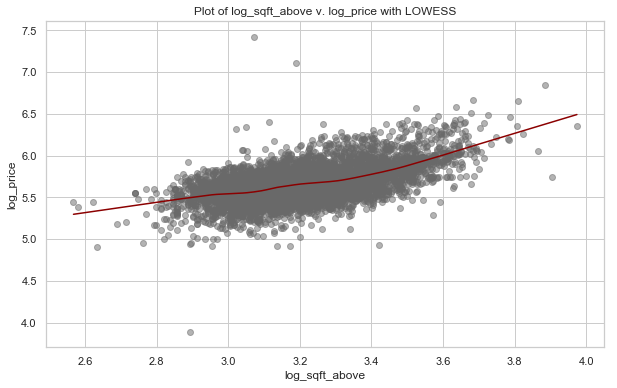

In [34]:
lowess_scatter(data, "log_sqft_above", "log_price")

The non linear relationship is evident in the log-log scatter plot.

**Condition vs Price**

As already mentioned condition and house prices might go hand in hand. If the condition of the house is good it will be expensive. But we still have no idea what do the numbers 1-5 mean in terms of condition of the hosue.

In [35]:
correlation(data, "condition", "price")

Correlation coefficients:
r   = 0.03856574371902377
rho = 0.03136985104377846


But the correlation coefficients are very low to signify any meaningful relationship between the variables.

In [36]:
describe_by_category(data, "price", "condition")

            count      mean       std      min       25%       50%       75%  \
condition                                                                      
1            6.00 306633.33 186665.92  7800.00 240000.00 310000.00 411500.00   
2           32.00 341808.31 423939.56 80000.00 168750.00 250000.00 330750.00   
3         2875.00 554768.82 431368.05 83000.00 332944.00 470000.00 654475.00   
4         1252.00 539885.85 811733.28 83300.00 304000.00 445000.00 619565.00   
5          435.00 649866.75 418901.42 83300.00 393200.00 557905.90 744975.00   

                  max  
condition              
1           550000.00  
2          2555000.00  
3         12899000.00  
4         26590000.00  
5          3200000.00  


The mean value of prices go up significantly higher for higher numbered condition but the variance is also higher to not to make any conclusions.

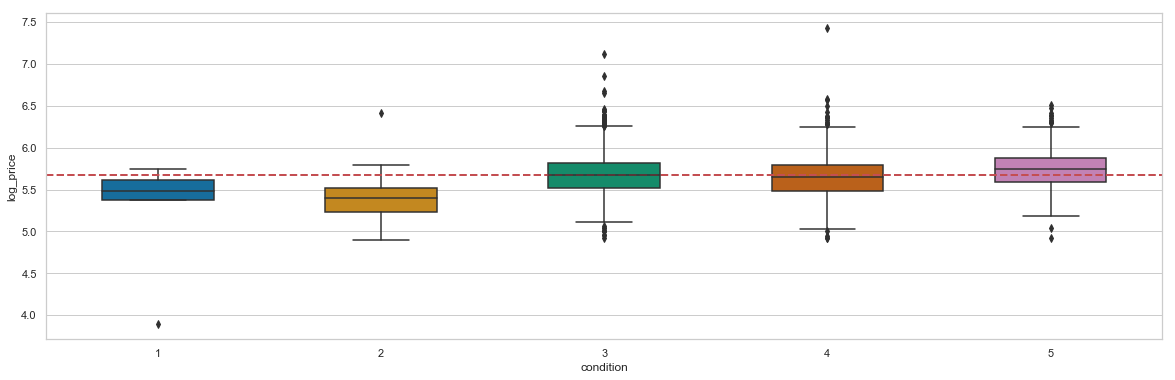

In [37]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
figure = sns.boxplot(y='log_price', x='condition', data=data, width=0.5,palette="colorblind")
plt.axhline(data.log_price.mean(),color='r',linestyle='dashed',linewidth=2) # to draw the mean log_price as horizontal line in the boxplot
    

It can be seen that for houses of conditions numbered 3,4 and 5 have their house price approximately equal to glboal average price as shown in red dashed line. But it is not high enough to certain any significant positive linear relationship.

**View vs Price**

It is general belief that the better the view higher the price. But it is not the only goverining criterial for the price.

In [38]:
correlation(data, "view", "price")

Correlation coefficients:
r   = 0.23725196739070234
rho = 0.28391720554143834


On contrary, the relationship of view and price is not very significant. We can look at the descripitive statistics for these variables and the box plot to see the trend. 

In [39]:
describe_by_category(data, "log_price", "view")

       count  mean  std  min  25%  50%  75%  max
view                                            
0    4140.00  5.65 0.22 3.89 5.50 5.65 5.79 7.42
1      69.00  5.87 0.24 5.26 5.73 5.86 6.03 6.38
2     205.00  5.83 0.24 5.24 5.68 5.82 5.97 6.85
3     116.00  5.94 0.25 5.03 5.77 5.95 6.12 6.39
4      70.00  6.02 0.25 5.56 5.86 6.00 6.19 6.67


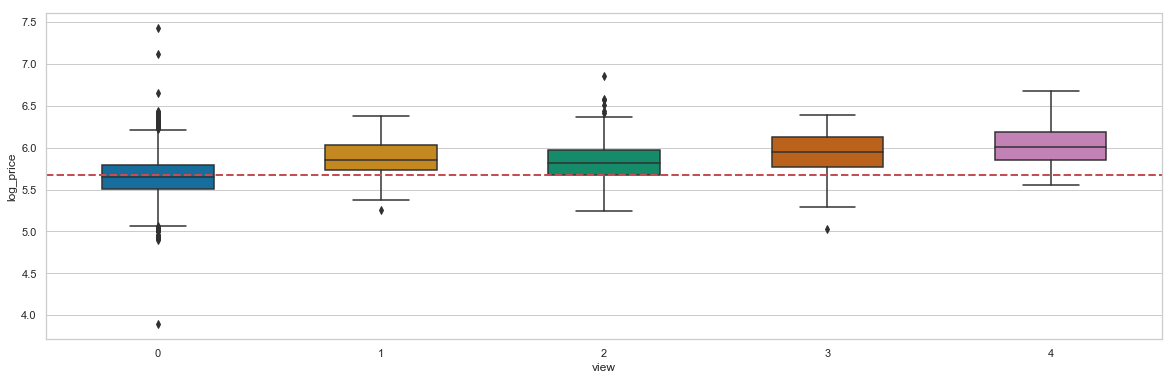

In [40]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
figure = sns.boxplot(y='log_price', x='view', data=data, width=0.5,palette="colorblind")
plt.axhline(data.log_price.mean(),color='r',linestyle='dashed',linewidth=2) # to draw the mean price as horizontal line in the boxplot
    

The box plot for view 2 and 3 shows us the price increased for view 2 and then it got down for view 3. The relationship is not significant either.